In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [58]:
# Load the dataset
file_path = 'Global_Superstore(CSV).csv'
data = pd.read_csv(file_path, encoding='latin1')

In [62]:
# Data Cleaning
# Rename columns to remove awkward characters and extra spaces
data.columns = data.columns.str.replace('ï»¿', '').str.strip()

# Check for duplicate rows
duplicate_count = data.duplicated().sum()
print(f'Duplicate Rows: {duplicate_count}')

# Handle missing values in the 'Postal Code' column
data['Postal Code'].fillna(0, inplace=True)

# Convert columns to numeric where possible, to handle errors during mean calculation
for col in data.columns:
    try:
        data[col] = pd.to_numeric(data[col], errors='coerce')
    except Exception as e:
        print(f'Error converting column {col}: {e}')

# Replace infinite values with NaN and then fill with mean (if any)
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.fillna(data.select_dtypes(include=[np.number]).mean(), inplace=True)

# Display basic information
data.info()
print(data.head())


Duplicate Rows: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          1000 non-null   int64  
 1   Order ID        0 non-null      float64
 2   Order Date      0 non-null      float64
 3   Ship Date       0 non-null      float64
 4   Ship Mode       0 non-null      float64
 5   Customer ID     0 non-null      float64
 6   Customer Name   0 non-null      float64
 7   Segment         0 non-null      float64
 8   Postal Code     1000 non-null   float64
 9   City            0 non-null      float64
 10  State           0 non-null      float64
 11  Country         0 non-null      float64
 12  Region          0 non-null      float64
 13  Market          0 non-null      float64
 14  Product ID      0 non-null      float64
 15  Category        0 non-null      float64
 16  Sub-Category    0 non-null      float64
 17  Product Name    

In [64]:
# Statistical Analysis
summary_stats = data.describe()
print('Summary Statistics:\n', summary_stats)

# Correlation matrix
numerical_data = data.select_dtypes(include=['number'])
correlation_matrix = numerical_data.corr()
print('Correlation Matrix:\n', correlation_matrix)

Summary Statistics:
              Row ID  Order ID  Order Date  Ship Date  Ship Mode  Customer ID  \
count   1000.000000       0.0         0.0        0.0        0.0          0.0   
mean   25079.328000       NaN         NaN        NaN        NaN          NaN   
std    12897.726632       NaN         NaN        NaN        NaN          NaN   
min       58.000000       NaN         NaN        NaN        NaN          NaN   
25%    15118.750000       NaN         NaN        NaN        NaN          NaN   
50%    25084.500000       NaN         NaN        NaN        NaN          NaN   
75%    34524.000000       NaN         NaN        NaN        NaN          NaN   
max    51284.000000       NaN         NaN        NaN        NaN          NaN   

       Customer Name  Segment   Postal Code  City  ...  Product ID  Category  \
count            0.0      0.0   1000.000000   0.0  ...         0.0       0.0   
mean             NaN      NaN  10469.437000   NaN  ...         NaN       NaN   
std              N

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

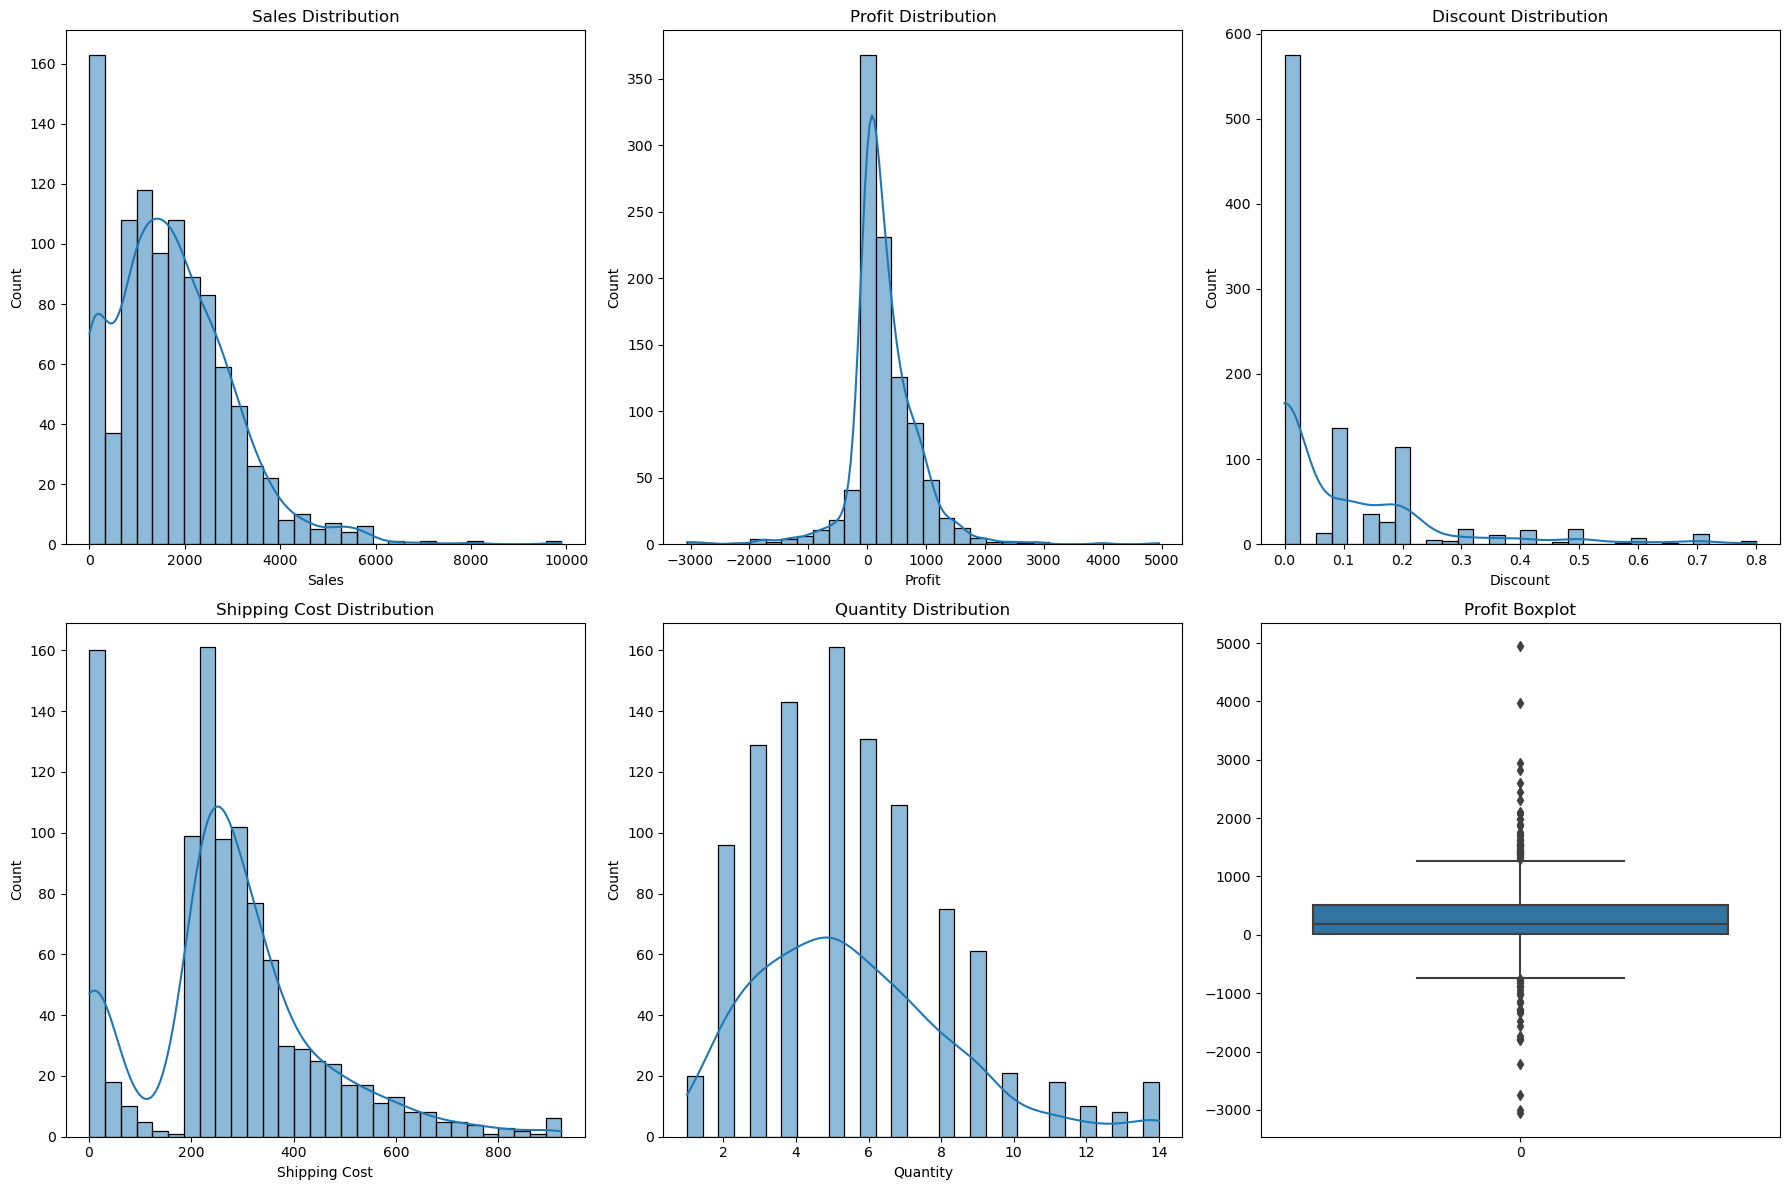

In [66]:
# Data Visualization
plt.figure(figsize=(18, 12))
plt.subplot(2, 3, 1)
sns.histplot(data['Sales'], bins=30, kde=True).set_title('Sales Distribution')
plt.subplot(2, 3, 2)
sns.histplot(data['Profit'], bins=30, kde=True).set_title('Profit Distribution')
plt.subplot(2, 3, 3)
sns.histplot(data['Discount'], bins=30, kde=True).set_title('Discount Distribution')
plt.subplot(2, 3, 4)
sns.histplot(data['Shipping Cost'], bins=30, kde=True).set_title('Shipping Cost Distribution')
plt.subplot(2, 3, 5)
sns.histplot(data['Quantity'], bins=30, kde=True).set_title('Quantity Distribution')
plt.subplot(2, 3, 6)
sns.boxplot(data['Profit']).set_title('Profit Boxplot')
plt.tight_layout()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


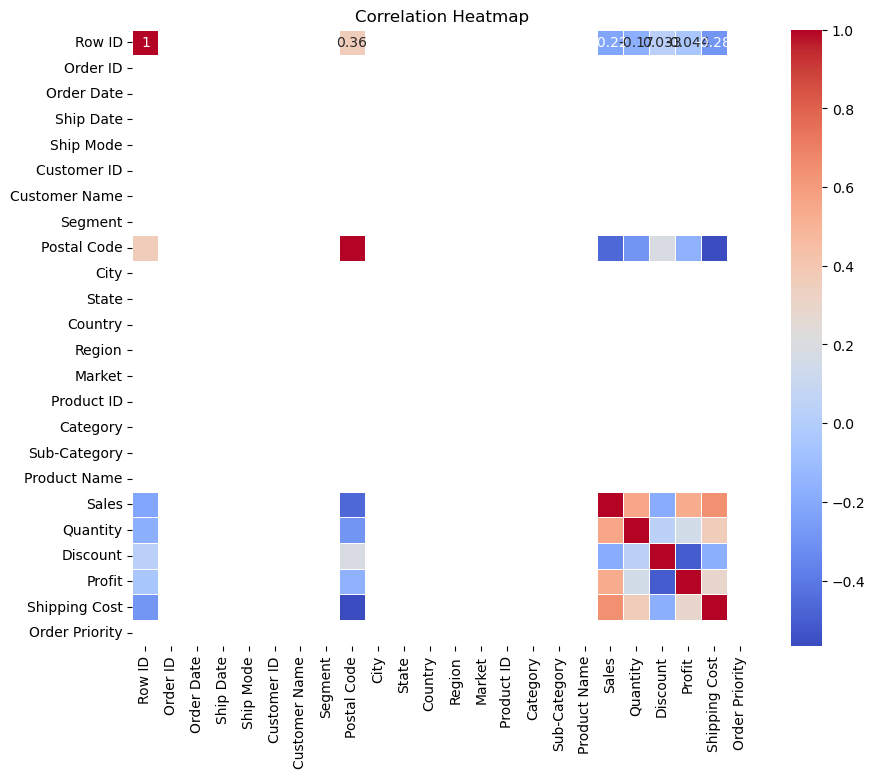

In [68]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()